In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
import yaml
import json
import seaborn as sns

In [34]:
def read_run(run):
  data = {}
  with open(run / "files" / "config.yaml") as fp:
    config = yaml.load(fp, yaml.SafeLoader)
    for k in ["a", "b", "c", "d", "ssm_act"]:
      val = config[f"{k}_bits"]["value"]
      data[k] = val if val is not None else -1
  with open(run / "files" / "wandb-summary.json") as fp:
    data["loss"] = json.load(fp)["Best Val Loss"]
  return data

In [35]:
runs = list(Path("wandb").glob("run-*"))
run_data = [read_run(x) for x in runs]
df = pd.DataFrame(run_data)
df.head()

,a,b,c,d,ssm_act,loss
0,16,-1,-1,-1,1,79.961792
1,2,-1,-1,-1,2,37.691601
2,8,-1,-1,-1,4,12.336293
3,1,-1,-1,-1,8,422.769348
4,1,-1,-1,-1,16,422.769653


Text(50.722222222222214, 0.5, 'A quantization')

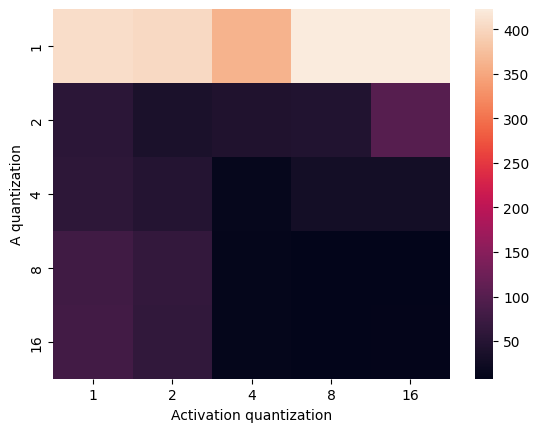

In [37]:
ax = sns.heatmap(df.pivot(index="a", columns="ssm_act", values="loss"))
ax.set_xlabel("Activation quantization")
ax.set_ylabel("A quantization")